In [81]:
import pandas as pd
import seaborn as sns
import numpy as np

In [82]:
df = pd.read_csv("Airlines.csv")

In [83]:
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [84]:
df.isna().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [85]:
df.Airline.unique()

array(['CO', 'US', 'AA', 'AS', 'DL', 'B6', 'HA', 'OO', '9E', 'OH', 'EV',
       'XE', 'YV', 'UA', 'MQ', 'FL', 'F9', 'WN'], dtype=object)

In [86]:
df.AirportFrom.nunique()

293

In [87]:
df.AirportTo.nunique()

293

In [88]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.00000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.00000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.60446,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.00000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.50000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.00000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.50000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.00000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [89]:
df.corr()

,id,Flight,DayOfWeek,Time,Length,Delay
id,1.000000,-0.006156,-0.055474,0.029156,0.020781,0.139762
Flight,-0.006156,1.000000,0.000416,-0.005750,-0.341481,-0.046175
DayOfWeek,-0.055474,0.000416,1.000000,0.001273,0.013397,-0.026199
Time,0.029156,-0.005750,0.001273,1.000000,-0.020612,0.150454
Length,0.020781,-0.341481,0.013397,-0.020612,1.000000,0.040489
Delay,0.139762,-0.046175,-0.026199,0.150454,0.040489,1.000000


<h1 style="color:green"> DAY OF THE WEEK</h1>

<AxesSubplot:xlabel='DayOfWeek'>

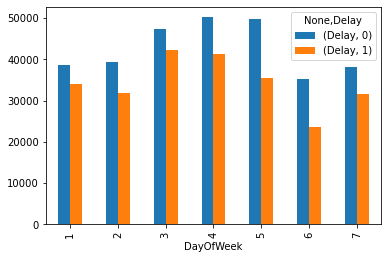

In [90]:
df.groupby(by = ["DayOfWeek","Delay"]).agg({"Delay":"count"}).unstack().plot.bar()

### Friday and saturday has less delay than the rest of the week. but the difference is not significant. (Can probably perform a hypothesis test here)

<h1 style="color:green"> AIRLINE</h1>

<AxesSubplot:xlabel='Airline'>

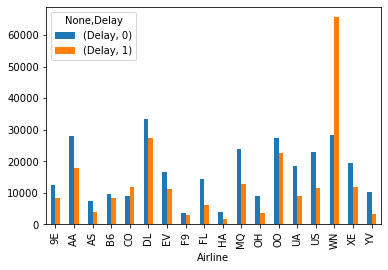

In [91]:
df.groupby(by = ["Airline","Delay"]).agg({"Delay":"count"}).unstack().plot.bar()

### F9, CO, WN, DL, B6, OO have high delay rate

In [92]:
df_by_airline_delayrate = df.groupby(by = ["Airline", "Delay"]).agg({"Delay":"count"}).unstack()
df_by_airline_delayrate["delay_rate"]= np.divide(df_by_airline_delayrate.iloc[:,1],
                                                     df_by_airline_delayrate.iloc[:,0])
df_by_airline_delayrate.delay_rate.describe()

count    18.000000
mean      0.731688
std       0.456504
min       0.320855
25%       0.485805
50%       0.622702
75%       0.818570
max       2.308615
Name: delay_rate, dtype: float64

<h1 style="color:green"> AIRPORT</h1>

In [93]:
df_by_airportfrom_delayrate = df.groupby(by = ["AirportFrom", "Delay"]).agg({"Delay":"count"}).unstack()
df_by_airportfrom_delayrate["delay_rate"]= np.divide(df_by_airportfrom_delayrate.iloc[:,1],
                                                     df_by_airportfrom_delayrate.iloc[:,0])

In [94]:
df_by_airportto_delayrate = df.groupby(by = ["AirportTo", "Delay"]).agg({"Delay":"count"}).unstack()
df_by_airportto_delayrate["delay_rate"]= np.divide(df_by_airportto_delayrate.iloc[:,1],
                                                     df_by_airportto_delayrate.iloc[:,0])

C:\Users\Clivia\Anaconda3-2019.10\envs\IOD\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='delay_rate'>

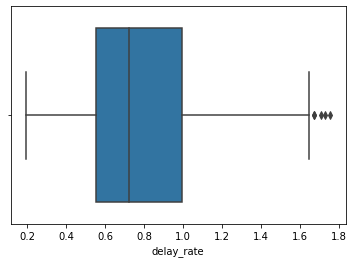

In [95]:
sns.boxplot(df_by_airportto_delayrate.delay_rate)

In [96]:
df_by_airportto_delayrate.delay_rate.describe()

count    292.000000
mean       0.783180
std        0.318774
min        0.192308
25%        0.551974
50%        0.720338
75%        0.992003
max        1.755831
Name: delay_rate, dtype: float64

In [97]:
df_by_airportfrom_delayrate.delay_rate.describe()

count    293.000000
mean       0.648578
std        0.352572
min        0.132353
25%        0.421053
50%        0.583463
75%        0.775391
max        2.776183
Name: delay_rate, dtype: float64

<h1 style="color:green"> FEATURE ENGINEERING ON AIRLINE & AIRPORT</h1>

## Airline, Airport from and Airport to are categorical features, but they have too many categories. We will divide each of the feature into 2 categories: below & above the delay rate mean 

In [98]:
#calculate the delay rate mean for each Airline:
airline_delay_rate_mean = df_by_airline_delayrate.delay_rate.mean()

#Generate a list of airline that delay more than average:
list_more_delay_airline = df_by_airline_delayrate[df_by_airline_delayrate.delay_rate>
                                                  airline_delay_rate_mean].index.values.tolist()

df["more_delay_airline"] = df["Airline"].apply(lambda x : 1 if x in list_more_delay_airline
                                               else 0)

In [99]:
#calculate the delay rate mean for each AirportFrom:
airportfrom_delay_rate_mean = df_by_airportfrom_delayrate.delay_rate.mean()

#Generate a list of airportfrom that delay more than average:
list_more_delay_airportfrom = df_by_airportfrom_delayrate[df_by_airportfrom_delayrate.delay_rate>
                                                  airportfrom_delay_rate_mean].index.values.tolist()

df["more_delay_airportfrom"] = df["AirportFrom"].apply(lambda x : 1 if x in list_more_delay_airportfrom
                                               else 0)

In [100]:
#calculate the delay rate mean for each AirportTo:
airportto_delay_rate_mean = df_by_airportto_delayrate.delay_rate.mean()

#Generate a list of airportto that delay more than average:
list_more_delay_airportto = df_by_airportto_delayrate[df_by_airportto_delayrate.delay_rate>
                                                  airportto_delay_rate_mean].index.values.tolist()

df["more_delay_airportto"] = df["AirportTo"].apply(lambda x : 1 if x in list_more_delay_airportto
                                               else 0)

In [101]:
airportto_most_delay_rate_75 = df_by_airportto_delayrate.delay_rate.quantile(q=0.75)
list_most_delay_airportto = df_by_airportto_delayrate[df_by_airportto_delayrate.delay_rate>
                                                  airportto_most_delay_rate_75].index.values.tolist()
df["most_delay_airportto"] = df["AirportTo"].apply(lambda x : 1 if x in list_most_delay_airportto
                                               else 0)

In [102]:
airportfrom_most_delay_rate_75 = df_by_airportfrom_delayrate.delay_rate.quantile(q=0.75)
list_most_delay_airportfrom = df_by_airportfrom_delayrate[df_by_airportfrom_delayrate.delay_rate>
                                                  airportfrom_most_delay_rate_75].index.values.tolist()
df["most_delay_airportfrom"] = df["AirportFrom"].apply(lambda x : 1 if x in list_most_delay_airportfrom
                                               else 0)

<h1 style="color:green">TIME & LENGTH</h1>

<AxesSubplot:xlabel='Time', ylabel='Length'>

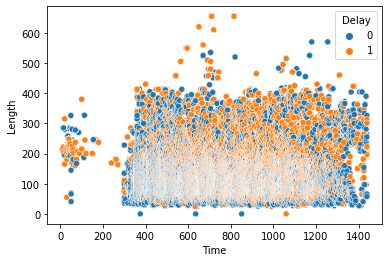

In [103]:
sns.scatterplot(x = df.Time, y = df.Length, hue = df.Delay)

In [104]:
df["timeofday"] = pd.cut(df.Time,bins = 3, labels = ["morning","afternoon","evening"])

<AxesSubplot:xlabel='timeofday'>

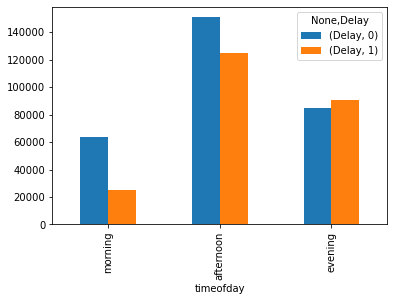

In [105]:
df.groupby(by = ["timeofday","Delay"]).agg({"Delay":"count"}).unstack().plot.bar()

### We can see that it is less delay in the morning and more delays occur later in the day

In [106]:
a = df[df.Time <720]["Delay"].sample(100,random_state=1)
b = df[df.Time >720]["Delay"].sample(100,random_state=1)

In [107]:
from scipy import stats
t,p = stats.ttest_ind(a,b)
print("t = " + str(t))
print("p = " + str(p))

t = -3.6663769890642195
p = 0.00031600666081269284


### there is a significantly difference in delay rate between early and later in the day.

In [108]:
df.Length.describe()

count    539383.000000
mean        132.202007
std          70.117016
min           0.000000
25%          81.000000
50%         115.000000
75%         162.000000
max         655.000000
Name: Length, dtype: float64

In [109]:
c = df[df.Length <115]["Delay"].sample(100,random_state=1)
d = df[df.Length >115]["Delay"].sample(100,random_state=1)

In [110]:
t2,p2 = stats.ttest_ind(c,d)
print("t = " + str(t2))
print("p = " + str(p2))

t = -1.4167918937066917
p = 0.1581152309552422


### There is no difference in delay rate between long & short flights

<h1 style="color:green">CLASSIFICATION</h1>

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
df.head(1)

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,more_delay_airline,more_delay_airportfrom,more_delay_airportto,most_delay_airportto,most_delay_airportfrom,timeofday
0,1,CO,269,SFO,IAH,3,15,205,1,1,1,0,0,1,morning


In [112]:
#Define tested features and target variable
tested_feature_list = ["more_delay_airline","Time"]
X = df.loc[:,tested_feature_list]
y = df.Delay

In [113]:
#Spliting datasest
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 1)

## Logistic Regression

In [114]:
logreg = LogisticRegression()
model =logreg.fit(X_train,y_train)
model.score(X_train,y_train)

0.6284454909085853

In [115]:
model.score(X_test,y_test)

0.6274831521084198

In [116]:
# ANSWER
y_pred_class = logreg.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[45752 14007]
 [26179 21939]]


In [117]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


In [118]:
# ANSWER
def plot_roc_curve(X_test, y_test):
    # Generate the prediction values for each of the test observations using predict_proba() 
    #function rather than just predict
    preds = logreg.predict_proba(X_test)[:,1]

    # Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)

    # Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
    roc_auc = metrics.auc(fpr, tpr)

    # Plot the ROC Curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    plt.show()

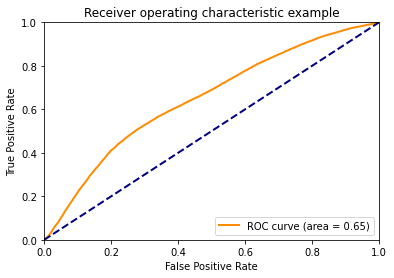

In [119]:
plot_roc_curve(X_test, y_test)

In [120]:
from sklearn.model_selection import cross_val_score
target_col = 'Delay'
feature_cols = tested_feature_list
logreg = LogisticRegression()
scores = cross_val_score(logreg, df[feature_cols], df[target_col], cv=5)
scores.mean()

0.628004622701361

In [121]:
def score_heatmap_cl(X_test, y_pred):
    y_pred = model.predict(X_test)
    ac = accuracy_score(y_test, y_pred)
    print('Accuracy:', ac)
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm, annot=True, fmt='d');
    print(classification_report(y_test,y_pred))

Accuracy: 0.6274831521084198
              precision    recall  f1-score   support

           0       0.64      0.77      0.69     59759
           1       0.61      0.46      0.52     48118

    accuracy                           0.63    107877
   macro avg       0.62      0.61      0.61    107877
weighted avg       0.62      0.63      0.62    107877



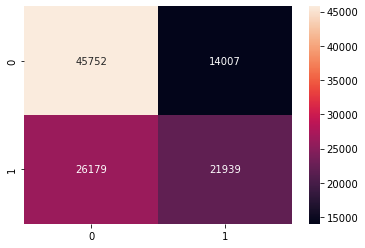

In [122]:
score_heatmap_cl(X_test, y_pred_class)

## Support Vector Machine

In [123]:
from sklearn import svm
from sklearn.datasets import make_blobs

# Naive Bayes

In [124]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [125]:
Nb_model = GaussianNB()
Nb_model.fit(X_train, y_train)
Nb_model.score(X_train,y_train)

0.6305242569048866

In [126]:
Nb_model.score(X_test,y_test)

0.6306719690017335

In [127]:
y_pred_Nb = Nb_model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_Nb))

[[45579 14180]
 [25662 22456]]


In [128]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


In [144]:
def plot_roc_curve_nb_model(X_test, y_test):
    # Generate the prediction values for each of the test observations using predict_proba() 
    #function rather than just predict
    preds = Nb_model.predict_proba(X_test)[:,1]

    # Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)

    # Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
    roc_auc = metrics.auc(fpr, tpr)

    # Plot the ROC Curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example-Naive Bayes model')
    plt.legend(loc = "lower right")
    plt.show()

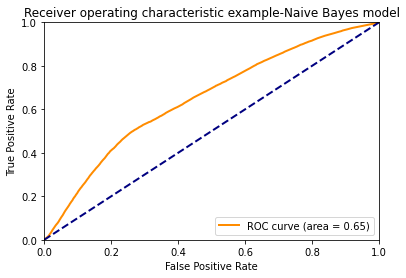

In [145]:
plot_roc_curve_nb_model(X_test, y_test)

In [131]:
def score_heatmap_nb(X_test, y_pred):
    y_pred = Nb_model.predict(X_test)
    ac = accuracy_score(y_test, y_pred)
    print('Accuracy:', ac)
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm, annot=True, fmt='d');
    print(classification_report(y_test,y_pred))

In [133]:
scores_nb = cross_val_score(Nb_model, df[feature_cols], df[target_col], cv=5)
scores_nb.mean()

0.6303499012060941

Accuracy: 0.6306719690017335
              precision    recall  f1-score   support

           0       0.64      0.76      0.70     59759
           1       0.61      0.47      0.53     48118

    accuracy                           0.63    107877
   macro avg       0.63      0.61      0.61    107877
weighted avg       0.63      0.63      0.62    107877



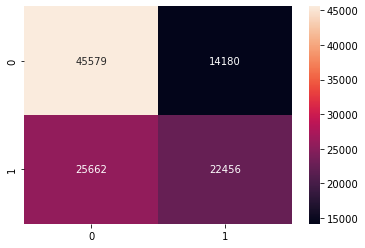

In [132]:
score_heatmap_nb(X_test, y_pred_Nb )

In [ ]:
# true positve is higher than the logistic classification

# Perceptron/Neural network

In [135]:
from sklearn.linear_model import Perceptron

In [136]:
pcptn_model  = Perceptron()
pcptn_model.fit(X_train, y_train)
pcptn_model.score(X_train,y_train)

0.5392555375823279

In [138]:
y_pred_pcptn = pcptn_model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_pcptn))

[[16443 43316]
 [ 6275 41843]]


In [139]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


In [152]:
def plot_roc_curve_pcptn_model(X_test, y_test):
    # Generate the prediction values for each of the test observations using predict_proba() 
    #function rather than just predict
    preds = Perceptron.predict_proba(X_test)[:,1]

    # Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)

    # Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
    roc_auc = metrics.auc(fpr, tpr)

    # Plot the ROC Curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Naive Bayes model')
    plt.legend(loc = "lower right")
    plt.show()
# perceptron doesn't have a method of predict_proba

In [150]:
def score_heatmap_pcptn(X_test, y_pred):
    y_pred = pcptn_model.predict(X_test)
    ac = accuracy_score(y_test, y_pred)
    print('Accuracy:', ac)
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm, annot=True, fmt='d');
    print(classification_report(y_test,y_pred))

Accuracy: 0.5403005274525617
              precision    recall  f1-score   support

           0       0.72      0.28      0.40     59759
           1       0.49      0.87      0.63     48118

    accuracy                           0.54    107877
   macro avg       0.61      0.57      0.51    107877
weighted avg       0.62      0.54      0.50    107877



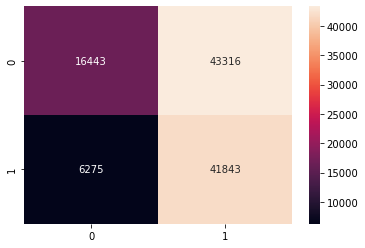

In [151]:
score_heatmap_pcptn(X_test, y_pred_pcptn )